Poniższa analiza danych dotyczy szerszej analizy związanej z Chorobami Niedokrwiennymi Serca. W analizie skupiono się na opracowaniu wyników ankiety, którą przeprowadzono na grupie 130 sutdentów pielęgniarstwa. Celem ankiety, oraz przeprowadzonej poniżej analizy danych, jest wykazanie, czy występują istotne statystycznie zależności między poszczególnymi grupami sutentów, a udzielonymi przez respondentów odpowiedziami (poprawnymi świadczącymi o poziomie wiedzy ankietowanej osoby, oraz  subiektywną oceną ankietowanego).

#### autor: Łukasz Dobrowolski

In [83]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import math

In [84]:
dane = pd.read_csv('Formularz bez nazwy.csv')

Przegląd zawartości kolumn w analizowanych wynikach ankiety, w celu opracowania strategii

In [85]:
dane.columns

Index(['Sygnatura czasowa', '1. Płeć:', '2. Wiek w latach:',
       '3. Staż pracy w latach :', '4. Miejsce zamieszkania:',
       '5. Miejsce pracy:',
       '6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ',
       '7. Czym według Pani/Pana jest Choroba Niedokrwienna Serca? ',
       '8. Główną przyczyną Choroby Niedokrwiennej Serca według Pani/Pana jest? ',
       '9. Według Pani/Pana Choroba Niedokrwienna serca powstaje w mechanizmie…',
       '10. Klinicznie Choroba Niedokrwienna Serca dzieli się na: stabilną dławicę piersiową oraz ostre zespoły wieńcowe?  ',
       '11. Do ostrych zespołów wieńcowych Pani/Pana zdaniem zalicza się:',
       '12. Typowym objawem stabilnej Choroby Niedokrwiennej Serca jest:',
       '13. Proszę zaznaczyć które czynniki według Pani/Pana predysponują do zachorowania na Chorobę Niedokrwienną Serca?',
       '14. Według Pani/Pana do modyfikowalnych czynników ryzyka Choroby Niedokrwiennej Serca należy:',
       '15. Wedł

Przejrzano zawartość kolum, w których dane mogą być nieujednolicone:

In [86]:
dane['3. Staż pracy w latach :'].unique()

array(['2', '7', '1', '0', '1,5', '0,5', '5', '4', '4 ', '31', '26', '29',
       '24', 'Rok', '15', '18', '20', '30', 'Brak', '1 rok', '6', '12',
       '3 miesiące ', '25', '21', '22', '18 lat ', 'Student', '28',
       '1,5 roku', '17', '1,5roku', '1rok', '3', '23', '10', '29 ',
       'brak stażu ', 'brak stażu', 'brak stażu pracy', 'brak', 'brak ',
       '34', '27', '-'], dtype=object)

W celu poprawnej analizy danych oraz ujednolicenia zmiennych ułatwiających dalsze analizy, zastosowano 'data cleaning'.

In [87]:
#sprowadzenie wszystkich danych dotyczących stażu pracy do wartości liczbowych
dane['3. Staż pracy w latach :'] = dane['3. Staż pracy w latach :'].replace([' ','lat','lata','Lata','roku'], '', regex=True)
dane['3. Staż pracy w latach :'] = dane['3. Staż pracy w latach :'].replace([','], '.', regex=True)
dane['3. Staż pracy w latach :'].replace(['-','Brak','Student','brak','brakstażu','brakstażupracy'],'0',inplace=True)
dane['3. Staż pracy w latach :'].replace(['1rok','Rok','0,5','3miesiące'],'1',inplace=True)
dane['2. Wiek w latach:'] = dane['2. Wiek w latach:'].replace([' ','lat'],'',regex=True)

#ujednolicenie dwóch podobnych odpowiedzi w jedną (na prośbę odbiorcy)
dane['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '].replace(['Trudno powiedzieć','Trudno powiedzieć/ Średni'], 'Średni', inplace=True)

Czynność sprawdzającą zawartość każdej z kolumn, zastosowano w celu zrozumienia analizowanych danych, oraz w dalszym etapie przy towrzeniu funkcji punktujących poprawne odpowiedzi:

In [88]:
dane['5. Miejsce pracy:'].unique()

array(['Oddział szpitalny', 'Inne', 'Przychodnia POZ/punkt pobrań',
       'Blok operacyjny', 'Brak pracy w zawodzie'], dtype=object)

Zmodyfikowano po przez uproszczenie i zastosowanie mniejszej ilości grup dane, dotyczące subiektywnej oceny własnej wiedzy sutdentów:

In [89]:
dane['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '].replace(['Bardzo niski'],'Niski',inplace=True)
dane['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '].replace(['Bardzo wysoki'],'Wysoki',inplace=True)
dane['5. Miejsce pracy:'].replace(['Oddział szpitalny','Blok operacyjny'], 'Oddział szpitalny / blok operacyjny', inplace=True)
dane['5. Miejsce pracy:'].replace(['Inne','Przychodnia POZ/punkt pobrań'],'POZ/punkt pobrań / inne',inplace=True)
dane['5. Miejsce pracy:'].unique()

array(['Oddział szpitalny / blok operacyjny', 'POZ/punkt pobrań / inne',
       'Brak pracy w zawodzie'], dtype=object)

Zamiana obiektów na liczby w celu umożliwienia kalkulacji (z kategorycznej na numeryczną):

In [90]:
dane['2. Wiek w latach:'] = pd.to_numeric(dane['2. Wiek w latach:'])
dane['3. Staż pracy w latach :'] = pd.to_numeric(dane['3. Staż pracy w latach :'])

W pierwszej kolejności stworzono podgrupy z podziałem na wiek, oraz staż pracy:

In [91]:
def grupy_wiekowe(x):
    if x <= 25:
        return 'Studenci do 25 r.ż.'
    else:  
        return 'Studenci powyżej 25 r.ż.'
    
def staz_zakres(x):
    if x >= 1 and x <= 2:
        return 'Do 2 lat'
    elif x > 2 and x <= 20:
        return 'Od 2 do 20 lat'
    elif x < 1:                 
        return 'Brak stażu pracy'  #osoby z mniej niż rocznym stażem pracy, uznano za osoby bez stażu pracy
    else:
        return 'Ponad 20 lat'
    

dane['Zakres stażu pracy'] = dane['3. Staż pracy w latach :'].apply(staz_zakres) 

dane['Grupa wiekowa'] = dane['2. Wiek w latach:'].apply(grupy_wiekowe)

Poniżej stworzono szereg funkcji, tworzących kolumny z wynikiem przyznanym za każdą udzieloną odpowiedź. Stworzenie kolumn punktujących poprawne odpowiedzi, ma na celu zsumowanie wszystkich odpowiedzi osoby ankietowanej, oraz określenia otrzymanej przez nią całkowitej liczby punktów i tym samym określenia poziomu wiedzy w dalszym toku analizy. W przypadku pytań z wielokrotną odpowiedzią, przyznano punkty za każdą prawidłowo udzieloną odpowiedź (brak punktów ujemnych):

In [92]:
# pytanie 7
def pytanie7(x):
    if x == 'Jest to zespół objawów klinicznych, spowodowanych zaburzeniem równowagi między dostarczeniem tlenu i innych substancji niezbędnych do prawidłowego funkcjonowania mięśnia sercowego a jego aktualnym zapotrzebowaniem':
        return 1
    else:
        return 0
dane['Poprawne odpowiedzi na pytanie 7'] = dane.iloc[ : , 7 ].apply(pytanie7)

#pytanie 8
def pytanie8(x):
    if x == 'Miażdżyca tętnic wieńcowych':
        return 1
    else:
        return 0
dane['Poprawne odpowiedzi na pytanie 8'] = dane.iloc[ : , 8 ].apply(pytanie8)

#pytanie 9
def pytanie9(x):
    if x == 'Tworzenia się blaszek miażdżycowych w naczyniach wieńcowych':
        return 1
    else:
        return 0   
dane['Poprawne odpowiedzi na pytanie 9'] = dane.iloc[ : , 9 ].apply(pytanie9)

#pytanie 10
def pytanie10(x):
    if x == 'Tak':
        return 1
    else:
        return 0   
dane['Poprawne odpowiedzi na pytanie 10'] = dane.iloc[ : , 10 ].apply(pytanie10)

#pytanie 11
def pytanie11(x):
    if x == 'Wszystkie powyższe':
        return 1
    else:
        return 0   
dane['Poprawne odpowiedzi na pytanie 11'] = dane.iloc[ : , 11 ].apply(pytanie11)

#pytanie 12
def pytanie12(x):
    if x == 'Ból w klatce piersiowej, nasilający się w czasie wysiłku, stresu, czy po obfitym posiłku':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 12'] = dane.iloc[ : , 12 ].apply(pytanie12)

#pytanie 13
#zamiana obiektów na listę w celu weryfikacji poprawnej ilości odpowiedzi 

dane['13. Proszę zaznaczyć które czynniki według Pani/Pana predysponują do zachorowania na Chorobę Niedokrwienną Serca?'] = \
dane['13. Proszę zaznaczyć które czynniki według Pani/Pana predysponują do zachorowania na Chorobę Niedokrwienną Serca?']\
.apply(lambda x : x.split(';'))

#lista poprawnych odpowiedzi
poprawne_p13 =['Wiek','Płeć','Poziom wykształcenia','Obciążenia genetyczne','Cukrzyca','Przedwczesna menopauza','Nadciśnienie Tętnicze','Zaburzenia lipidowe','Palenie papierosów','Nadwaga/ Otyłość','Stres','Zespół metaboliczny']

#kolumna zawierająca jedynie punktowane odpowiedzi ankietowanej osoby (jeżeli odpowiedź znajduje się na liście poprawnych)
dane['Poprawne odpowiedzi na pytanie 13'] = \
dane['13. Proszę zaznaczyć które czynniki według Pani/Pana predysponują do zachorowania na Chorobę Niedokrwienną Serca?']\
.apply(lambda x : list(set(x).intersection(set(poprawne_p13))))

#kolumna z wynikiem za pytanie 13
dane['Punkty za pytanie 13'] = dane['Poprawne odpowiedzi na pytanie 13'].apply(lambda x :len(x))


#pytanie 14
#zamiana obiektów na listę w celu weryfikacji poprawnej ilości odpowiedzi 

dane['14. Według Pani/Pana do modyfikowalnych czynników ryzyka Choroby Niedokrwiennej Serca należy:'] = \
dane['14. Według Pani/Pana do modyfikowalnych czynników ryzyka Choroby Niedokrwiennej Serca należy:']\
.apply(lambda x : x.split(';'))

#lista poprawnych odpowiedzi
poprawne_p14 =['Palenie tytoniu','Nadmierne spożycie alkoholu','Cukrzyca','Otyłość']
#kolumna zawierająca jedynie punktowane odpowiedzi ankietowanej osoby (jeżeli odpowiedź znajduje się na liście poprawnych)
dane['Poprawne odpowiedzi na pytanie 14'] = \
dane['14. Według Pani/Pana do modyfikowalnych czynników ryzyka Choroby Niedokrwiennej Serca należy:']\
.apply(lambda x : list(set(x).intersection(set(poprawne_p14))))

#kolumna z wynikiem za pytanie 14
dane['Punkty za pytanie 14'] = dane['Poprawne odpowiedzi na pytanie 14'].apply(lambda x :len(x))

#pytanie 15
#zamiana obiektów na listę w celu weryfikacji poprawnej ilości odpowiedzi 

dane['15. Według Pani/Pana do niemodyfikowalnych czynników ryzyka Choroby Niedokrwiennej Serca należy:'] = \
dane['15. Według Pani/Pana do niemodyfikowalnych czynników ryzyka Choroby Niedokrwiennej Serca należy:']\
.apply(lambda x : x.split(';'))

#lista poprawnych odpowiedzi
poprawne_p15 =['Płeć','Czynniki genetyczne','Wiek']
#kolumna pomocnicza filtrująca jedynie punktowane odpowiedzi ankietowanej osoby
dane['Poprawne odpowiedzi na pytanie 15'] = \
dane['15. Według Pani/Pana do niemodyfikowalnych czynników ryzyka Choroby Niedokrwiennej Serca należy:']\
.apply(lambda x : list(set(x).intersection(set(poprawne_p15))))

#kolumna z wynikiem za pytanie 15
dane['Punkty za pytanie 15'] = dane['Poprawne odpowiedzi na pytanie 15'].apply(lambda x :len(x))

#pytanie 16
def pytanie16(x):
    if x == 'tak':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 16'] = dane.iloc[ : , 16 ].apply(pytanie16)

#pytanie 17
def pytanie17(x):
    if x == 'Tak':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 17'] = dane.iloc[ : , 17 ].apply(pytanie17)

#pytanie 18
def pytanie18(x):
    if x == 'Osobowość typu A (ambitny, agresywny, skłonny do uniesień)':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 18'] = dane.iloc[ : , 18 ].apply(pytanie18)


#pytanie 19
#zamiana obiektów na listę w celu weryfikacji poprawnej ilości odpowiedzi 

dane['19. Według Pani/Pana prawidłowe ciśnienie tętnicze krwi mieści się w przedziałach: '] = \
dane['19. Według Pani/Pana prawidłowe ciśnienie tętnicze krwi mieści się w przedziałach: ']\
.apply(lambda x : x.split(';'))

#lista poprawnych odpowiedzi
poprawne_p19 =['skurczowe 120-129mmHg','rozkurczowe 80-84 mmHg']
#kolumna pomocnicza filtrująca jedynie punktowane odpowiedzi ankietowanej osoby
dane['Poprawne odpowiedzi na pytanie 19'] = \
dane['19. Według Pani/Pana prawidłowe ciśnienie tętnicze krwi mieści się w przedziałach: ']\
.apply(lambda x : list(set(x).intersection(set(poprawne_p19))))

#kolumna z wynikiem za pytanie 19
dane['Punkty za pytanie 19'] = dane['Poprawne odpowiedzi na pytanie 19'].apply(lambda x :len(x))


#pytanie 20
def pytanie20(x):
    if x == 'Nie':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 20'] = dane.iloc[ : , 20 ].apply(pytanie20)

#pytanie 21
def pytanie21(x):
    if x == 'U mężczyzn do 20g na dobę a u kobiet do 10g':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 21'] = dane.iloc[ : , 21 ].apply(pytanie21)

#pytanie 22
def pytanie22(x):
    if x == 'Do 6g':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 22'] = dane.iloc[ : , 22 ].apply(pytanie22)

#pytanie 23
def pytanie23(x):
    if x == '< 115mg/dl':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 23'] = dane.iloc[ : , 23 ].apply(pytanie23)


#pytanie 24
def pytanie24(x):
    if x == 'Dla kobiet > 46mg/dl, dla mężczyzn >40mg/dl':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 24'] = dane.iloc[ : , 24 ].apply(pytanie24)

#pytanie 25
def pytanie25(x):
    if x == 'Fałsz':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 25'] = dane.iloc[ : , 25 ].apply(pytanie25)


#pytanie 26
def pytanie26(x):
    if x == '< 190mg/dl':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 26'] = dane.iloc[ : , 26 ].apply(pytanie26)

#pytanie 27
def pytanie27(x):
    if x == '70-100 mg%':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 27'] = dane.iloc[ : , 27 ].apply(pytanie27)

#pytanie 28
def pytanie28(x):
    if x == '19-25 kg/m2':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 28'] = dane.iloc[ : , 28 ].apply(pytanie28)

#pytanie 29
def pytanie29(x):
    if x == 'leki fibrynolityczne, Przeciwpłytkowe, Diuretyki pętlowe, Nitraty':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 29'] = dane.iloc[ : , 29 ].apply(pytanie29)

#pytanie 30
def pytanie30(x):
    if x == 'wszystkie powyższe':
        return 1
    else:
        return 0 
dane['Poprawne odpowiedzi na pytanie 30'] = dane.iloc[ : , 30 ].apply(pytanie30)

Szybki przegląd oraz weryfikacja czy wszystkie kolumny z punktami zostały stworzone prawidłowo:

In [93]:
dane.columns

Index(['Sygnatura czasowa', '1. Płeć:', '2. Wiek w latach:',
       '3. Staż pracy w latach :', '4. Miejsce zamieszkania:',
       '5. Miejsce pracy:',
       '6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ',
       '7. Czym według Pani/Pana jest Choroba Niedokrwienna Serca? ',
       '8. Główną przyczyną Choroby Niedokrwiennej Serca według Pani/Pana jest? ',
       '9. Według Pani/Pana Choroba Niedokrwienna serca powstaje w mechanizmie…',
       '10. Klinicznie Choroba Niedokrwienna Serca dzieli się na: stabilną dławicę piersiową oraz ostre zespoły wieńcowe?  ',
       '11. Do ostrych zespołów wieńcowych Pani/Pana zdaniem zalicza się:',
       '12. Typowym objawem stabilnej Choroby Niedokrwiennej Serca jest:',
       '13. Proszę zaznaczyć które czynniki według Pani/Pana predysponują do zachorowania na Chorobę Niedokrwienną Serca?',
       '14. Według Pani/Pana do modyfikowalnych czynników ryzyka Choroby Niedokrwiennej Serca należy:',
       '15. Wedł

Stworzenie kolumny sumującej wszystkie poprawne odpowiedzi ankietowanej osoby, oraz kolumny określającej poziom wiedzy ankietowanego na podstawie uzyskanej liczby punktów:

In [94]:
dane['Uzyskane punkty'] = dane['Poprawne odpowiedzi na pytanie 7']+dane['Poprawne odpowiedzi na pytanie 8']+dane['Poprawne odpowiedzi na pytanie 9']+dane['Poprawne odpowiedzi na pytanie 10']+dane['Poprawne odpowiedzi na pytanie 11']+dane['Poprawne odpowiedzi na pytanie 12']+dane['Punkty za pytanie 13']+dane['Punkty za pytanie 14']+dane['Punkty za pytanie 15']+dane['Poprawne odpowiedzi na pytanie 16']+dane['Poprawne odpowiedzi na pytanie 17']+dane['Poprawne odpowiedzi na pytanie 18']+dane['Punkty za pytanie 19']+dane['Poprawne odpowiedzi na pytanie 20']+dane['Poprawne odpowiedzi na pytanie 21']+dane['Poprawne odpowiedzi na pytanie 22']+dane['Poprawne odpowiedzi na pytanie 23']+dane['Poprawne odpowiedzi na pytanie 24']+dane['Poprawne odpowiedzi na pytanie 25']+dane['Poprawne odpowiedzi na pytanie 26']+dane['Poprawne odpowiedzi na pytanie 27']+dane['Poprawne odpowiedzi na pytanie 28']+dane['Poprawne odpowiedzi na pytanie 29']+dane['Poprawne odpowiedzi na pytanie 30']

def o_wiedza(x):
    if x <13:
        return 'Niski'
    elif x >= 13 and x<=27:
        return 'Średni'
    else:
        return 'Wysoki'

dane['Obiektywny poziom wiedzy'] = dane['Uzyskane punkty'].apply(o_wiedza)

### Analiza danych

Poniżej zaprezentowano przetworzone wyniki ankiety, oraz pokazano informacje dotyczące poszczególnych grup:

In [95]:
pd.set_option("max_rows", None)
wyniki = dane[['Grupa wiekowa','Zakres stażu pracy','4. Miejsce zamieszkania:','5. Miejsce pracy:','6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ','Obiektywny poziom wiedzy','Uzyskane punkty']]

In [96]:
wyniki

,Grupa wiekowa,Zakres stażu pracy,4. Miejsce zamieszkania:,5. Miejsce pracy:,6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca?,Obiektywny poziom wiedzy,Uzyskane punkty
0,Studenci do 25 r.ż.,Do 2 lat,Miasto,Oddział szpitalny / blok operacyjny,Średni,Wysoki,39
1,Studenci powyżej 25 r.ż.,Od 2 do 20 lat,Miasto,POZ/punkt pobrań / inne,Niski,Niski,3
2,Studenci do 25 r.ż.,Do 2 lat,Miasto,POZ/punkt pobrań / inne,Niski,Średni,22
3,Studenci do 25 r.ż.,Do 2 lat,Wieś,POZ/punkt pobrań / inne,Średni,Średni,22
4,Studenci do 25 r.ż.,Do 2 lat,Miasto,Oddział szpitalny / blok operacyjny,Wysoki,Wysoki,35
5,Studenci do 25 r.ż.,Brak stażu pracy,Wieś,Oddział szpitalny / blok operacyjny,Średni,Wysoki,34
6,Studenci do 25 r.ż.,Do 2 lat,Miasto,Oddział szpitalny / blok operacyjny,Średni,Wysoki,28
7,Studenci do 25 r.ż.,Brak stażu pracy,Miasto,Oddział szpitalny / blok operacyjny,Średni,Wysoki,38
8,Studenci do 25 r.ż.,Od 2 do 20 lat,Miasto,POZ/punkt pobrań / inne,Niski,Średni,14
9,Studenci powyżej 25 r.ż.,Od 2 do 20 lat,Wieś,Oddział szpitalny / blok operacyjny,Średni,Wysoki,32


Na wstępie, przeanalizowano dystrybucję uzyskanych punktów:

C:\Users\DELL\anaconda3\envs\plotlyenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Uzyskane punkty', ylabel='Density'>

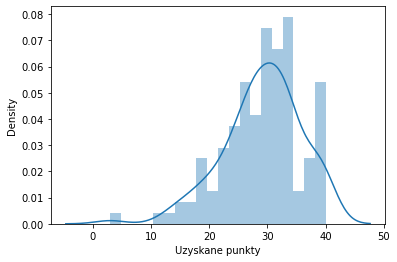

In [97]:
sns.distplot(dane['Uzyskane punkty'],bins=20)

Z powyższego wykresu można zaobserwować że badana grupa studentów w większoci uzyskała wyniki zbliżone do ~30 na 40 punktów. Można również zauważyć, że spora liczba studnetów uzyskała maksymalną liczbę punktów, tj 40. Sprawdzono, jak statystycznie wygląda średnia punktacja oraz tym samym poziom obketywnej wiedzy z zakresu CHNS wśród populacji studnetów pielęgniarstwa. W tym celu zostanie zastosowane wyznaczenie przedziałów ufności:

###### Wiedza studentów pielęgniarstwa z zakresu CHNS - Test t - studenta:

In [98]:
dane['Uzyskane punkty'].std()   #odchylenie standardowe liczone dla próby

# pomimo faktu, że próba zawiera powyżej 30 składowych, został zastosowany t - test do liczenia przedziałów ufności, 
# ze względu na brak znajomości wariancji populacji

dane_full_std_err = dane['Uzyskane punkty'].std()/math.sqrt(len(dane['Uzyskane punkty']))

# W przypadku t-statystyki należy również określić stopnie swobody
df = len(dane['Uzyskane punkty'])-1

t_score = stats.t.ppf(q=(1-0.05/2),df=df)    # q = alfa = poziom istotności dla testu dwustronnego ustalony na 95%

# obliczenie CI (przedziałów ufności) dla średniej punktacji w populacji, na podstawie próby
CI_t = [int(round(dane['Uzyskane punkty'].mean()-t_score*dane_full_std_err,2)),\
        int(round(dane['Uzyskane punkty'].mean()+t_score*dane_full_std_err,2))] 
CI_t

print(f'Na podstawie badanej próby możemy stwierdzić z 95% pewnością, że średni wyniki na 40 możliwych punktów uzyskanych w teście z       wiedzy na temata CHNS dla populacji stuedentów pielęgniarstwa, zawiera się w przedziale między {CI_t[0]} a {CI_t[1]} punktów, co na podstawie przyjętych zasad punktacji oznacza wysoki poziom wiedzy.' )

Na podstawie badanej próby możemy stwierdzić z 95% pewnością, że średni wyniki na 40 możliwych punktów uzyskanych w teście z       wiedzy na temata CHNS dla populacji stuedentów pielęgniarstwa, zawiera się w przedziale między 27 a 30 punktów, co na podstawie przyjętych zasad punktacji oznacza wysoki poziom wiedzy.


W kolejnym kroku została przedstawiona analiza wyników w poszczególnych podgrupach ankietowanych studentów ( dane w poszczególnych podgrupach zaprezentowano jedynie przy pomocy wykresów dystrybucji, z ominięciem obliczeń przedziałów ufności średnich wyników dla poszczegolnych podgrup).

#### 1. Grupa wiekowa
W podziale na grupy wiekowe, niewiele ponad połowę grupy stanowią studenci do 25 roku życia:

In [99]:
wyniki['Grupa wiekowa'].value_counts()

Studenci do 25 r.ż.         68
Studenci powyżej 25 r.ż.    62
Name: Grupa wiekowa, dtype: int64

In [100]:
wyniki_wiek = wyniki[['Grupa wiekowa','6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ','Obiektywny poziom wiedzy']].copy()
wyniki_wiek['Subiektywny poziom wiedzy'] = wyniki_wiek['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ']
wyniki_wiek.drop(['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '], axis=1, inplace=True)

a1 = wyniki_wiek.pivot_table(index='Grupa wiekowa', columns=['Obiektywny poziom wiedzy'],aggfunc='count').copy()
a2 = wyniki_wiek.pivot_table(index='Grupa wiekowa', columns=['Subiektywny poziom wiedzy'],aggfunc='count').copy()

a2.columns = [col[1] for col in a2.columns]
a1.columns = [col[1] for col in a1.columns]

display(a1.style.set_table_attributes("style='display:inline'").set_caption("Obiektywny poziom wiedzy"))
display(a2.style.set_table_attributes("style='display:inline'").set_caption("Subiektywny poziom wiedzy"))

,Niski,Wysoki,Średni
Grupa wiekowa,,,
Studenci do 25 r.ż.,1,37,30
Studenci powyżej 25 r.ż.,1,48,13


,Niski,Wysoki,Średni
Grupa wiekowa,,,
Studenci do 25 r.ż.,21,13,34
Studenci powyżej 25 r.ż.,8,21,33


Na podstawie powyższych tabel można stwierdzić że:
- 50% studentów z badanej grupy do 25 r.ż. poziom swojej wiedzy ocenia jako średni, 31% jako niski a pozoste 19% jako wysoki. W rzeczywistości natomiast, 54% studentów do 25 r.ż. wykazuje wysoki poziom wiedzy na temat CHNS, 44% wykazuje poziom średni i jedynie 2%  niski
- w przypadku studentów powyżej 25 r.ż. 49% twierdzi że posiada średni poziom wiedzy, 31% wysoki a pozostałe 20% stwierdza u siebie niski poziom wiedzy. Po obliczeniu wyników testu, można natomiast stwierdzić że studenci z danej grupy 25+ w większości (77%) posiadają wysoki poziom wiedzy na temat CHNS, 21% posiada średnią wiedzę w tym zakresie i jedynie 2% ankietowanych posiada wiedzę niską. 

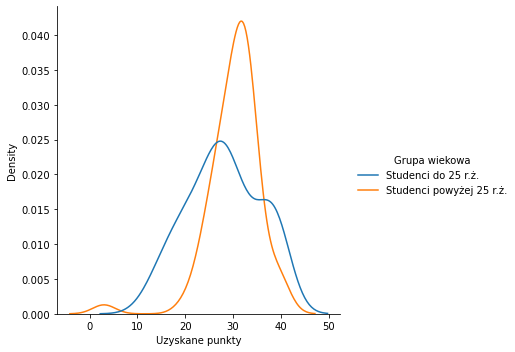

In [101]:
sns.displot(data=dane, x="Uzyskane punkty", hue="Grupa wiekowa",kind="kde")

Analiza punktacji przy zastosowaniu estymatora KDE zwraca uwagę na pewne trendy dotyczące punktacji. Studenci poniżej 25 r.ż. na podstawie uzyskanów punktów wykazują w dużej mierze wysoki poziom wiedzy, jednak krzywa dystrybucji ma charakter dużo bardziej rozproszony niż w przypadku studnetów powyżej 25 r.ż., gdzie widać wyraźny pik przy punktacji przekraczającej 30 punktów. Można zatem stwierdzić, że dużo bardziej prawdopodobne jest iż studenci powyżej 25 r.ż otrzymają wysoki wynik, oscylujący w okół 75%, niż prognozować punktację studentów do 25 r.ż. Tym samym, łatwiej jest określić poziom wiedzy studentów powyżej 25 r.ż.

#### 2. Staż pracy

W przypadku stażu pracy, w ankietowanej grupie wyróżniamy studentów zarówno bez doświadczenia, z krótkim doświadczeniem zawodowym ( do 2 lat), oraz studentów doświadczonych ( 2-20 lat stażu pracy), a także bardzo doświadczonych ( powyżej 20 lat stażu pracy). Nie zauważamy dominującej ilości studentów w którejkolwiek z grup. Przynależność osób ankietowanych jest zbliżona w każdej z 4 wyróżnionych grup pod względem stażu pracy.

In [102]:
wyniki['Zakres stażu pracy'].value_counts()

Brak stażu pracy    35
Od 2 do 20 lat      32
Do 2 lat            32
Ponad 20 lat        31
Name: Zakres stażu pracy, dtype: int64

In [103]:
wyniki_staz = wyniki[['Zakres stażu pracy','6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ','Obiektywny poziom wiedzy']].copy()
wyniki_staz['Subiektywny poziom wiedzy'] = wyniki_staz['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ']
wyniki_staz.drop(['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '], axis=1, inplace=True)

b1 = wyniki_staz.pivot_table(index='Zakres stażu pracy', columns=['Obiektywny poziom wiedzy'],aggfunc='count').copy().fillna(0).astype('int')
b2 = wyniki_staz.pivot_table(index='Zakres stażu pracy', columns=['Subiektywny poziom wiedzy'],aggfunc='count').copy()

b2.columns = [col[1] for col in b2.columns]
b1.columns = [col[1] for col in b1.columns]

display(b1.style.set_table_attributes("style='display:inline'").set_caption("Obiektywny poziom wiedzy"))
display(b2.style.set_table_attributes("style='display:inline'").set_caption("Subiektywny poziom wiedzy"))


,Niski,Wysoki,Średni
Zakres stażu pracy,,,
Brak stażu pracy,1,16,18
Do 2 lat,0,22,10
Od 2 do 20 lat,1,24,7
Ponad 20 lat,0,23,8


,Niski,Wysoki,Średni
Zakres stażu pracy,,,
Brak stażu pracy,15,1,19
Do 2 lat,4,14,14
Od 2 do 20 lat,7,11,14
Ponad 20 lat,3,8,20


Na podstawie powyższych tabel można stwierdzić:
- Ankietowani nie posiadający stażu pracy oceniają swój poziom wiedzy jako średni (53% ankietowanych) oraz niski (44%). Pozostałe osoby oceniają swój poziom wiedzy jako niski (3%). Na podstawie wyników ankiety wynika natomiast że studenci bez dośwaidczenia w pracy mają w większości średni poziom wiedzy (53%) oraz wysoki (44%). Jedynie 3% ankietowanych bez doświadczenia wykazuje niski poziom wiedzy
- Studenci posiadający staż pracy do 2 lat, poziom swojej wiedzy oceniają jako średni / wysoki (45% / 42%) natomiast 12% uważa że ma niską wiedzę. Uzyskane punkty przez studentów tej grupy wskazują że 70% studentów z doświadczeniem nie przekraczającym 2 lat, posiada wysoki poziom wiedzy, natomiast pozostałe 30% średni. W danej grupie nie występująstudenci o niskim poziomie wiedzy. 
- 44% studentów ze stażem pracy w zakresie 2 - 20 lat swój poziom wiedzy ocenia jako średni, 34% jako wysoki, a pozostałe 22% uważa że ma niską wiedzę. Wyniki testu wskazują natomiast że 75% studentów z takim stażem pracy posiada wysoką wiedzę z zakresu CHNS, 22% posiada wiedzę średnią i jedynie 3% wiedzę niską.
- ostatnia grupa studentów ( staż pracy powyżej 20 lat) poziom swojej wiedzy określa w większości jako średni (65%), 26% jako wysoki, oraz 9% jako niski. Obiektywnie, 74% studentów z tej grupy posiada wiedzę wysoką, oraz 26% średnią. W grupie z ponad dwudziestoletnim stażem nie występują osoby o niskim poziomie wiedzy z zakresu CHNS.

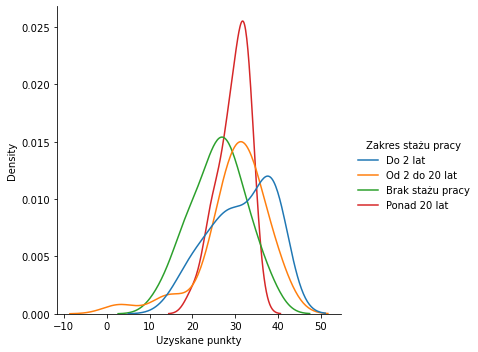

In [104]:
sns.displot(data=dane, x="Uzyskane punkty", hue="Zakres stażu pracy",kind="kde")

Jak widać na załączonym wykresie, najbardziej rozproszoną strukturę krzywej dystrybucji można zaobserwować w przypadku studentów ze stażem pracy nie przekraczającym 2 lat. Najbardziej klarownym poziomem wiedzy do określenia jest natomiast poziom wiedzy studnetów ze stażem pracy powyżej 20 lat. Poziom wiedzy z zakresu CHNS u studnetów z ponad 20 letnim stażem można określić na 75%.

#### 3. Miejsce zamieszkania

Zdecydowana większość studentów pochodzi z miast, niecałe 35% studentów to osoby pochodzące z miejscowości poza miejskich. 

In [105]:
wyniki['4. Miejsce zamieszkania:'].value_counts()

Miasto    85
Wieś      45
Name: 4. Miejsce zamieszkania:, dtype: int64

In [106]:
wyniki_miejscowosc = wyniki[['4. Miejsce zamieszkania:','6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ','Obiektywny poziom wiedzy']].copy()
wyniki_miejscowosc['Subiektywny poziom wiedzy'] = wyniki_miejscowosc['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ']
wyniki_miejscowosc.drop(['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '], axis=1, inplace=True)

c1 = wyniki_miejscowosc.pivot_table(index='4. Miejsce zamieszkania:', columns=['Obiektywny poziom wiedzy'],aggfunc='count').copy().fillna(0).astype('int')
c2 = wyniki_miejscowosc.pivot_table(index='4. Miejsce zamieszkania:', columns=['Subiektywny poziom wiedzy'],aggfunc='count').copy()

c2.columns = [col[1] for col in c2.columns]
c1.columns = [col[1] for col in c1.columns]

display(c1.style.set_table_attributes("style='display:inline'").set_caption("Obiektywny poziom wiedzy"))
display(c2.style.set_table_attributes("style='display:inline'").set_caption("Subiektywny poziom wiedzy"))

,Niski,Wysoki,Średni
4. Miejsce zamieszkania:,,,
Miasto,2,58,25
Wieś,0,27,18


,Niski,Wysoki,Średni
4. Miejsce zamieszkania:,,,
Miasto,15,27,43
Wieś,14,7,24


Na podstawie powyższych tabel można stwierdzić że:
- 54% studentów pochodących z sołectw uważa poziom swojej wiedzy za średni, 31% za niski i jedynie 15% za wysoki. Wyniki ankiety wskazują natomiast że aż 60% studentów pochodzących ze wsi posiada wysoką wiedzę z zakresu CHNS, a pozostałe 40% wiedzę średnią. Nie występują studneci w danej grupie z niskim poziomem wiedzy.
- W przypadku studentów pochodzących z miast, 51% uważa że ma średnią wiedzę z zakresu CHNS, 32% uważa że ma wiedzę wysoką, a pozostałe 17% niską. Obiektywnie, 68% studentów mieszkających w miastach ma wiedzę wysoką, 29% średnią i 3% wiedzę niską.

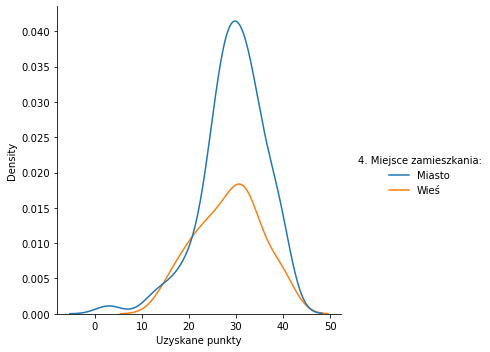

In [107]:
sns.displot(data=dane, x="Uzyskane punkty", hue="4. Miejsce zamieszkania:",kind="kde")

Krzywe dystrybucji z podziałem na miejsce zamieszkania wskazują, że nie ma istotnego znaczenia między miejscem pochodzenia a uzyskaną ilością punktów w teście wiedzy z zakresu CHNS. Wiedza i tym samym punktacja dla obu grup rozkłada się bardzo podobnie i można określić duże prawdopodobnieństwo na uzyskanie ok 75% z testu bez względu na miesjce pochodzenia osoby ankietowanej.

#### 4. Miejsce pracy

Najbardziej liczną grupą pod względem oddziału pracy studentów, jest Oddział szpitalny / blok operacyjny. W POZ / punkcie pobrań / innych oraz w przypadku braku pracy w zawodzie, liczność osób należących do grup z podziałem na miejsce pracy jest zbliżona. 

In [108]:
wyniki['5. Miejsce pracy:'].value_counts()

Oddział szpitalny / blok operacyjny    68
Brak pracy w zawodzie                  34
POZ/punkt pobrań / inne                28
Name: 5. Miejsce pracy:, dtype: int64

In [109]:
wyniki_miejsce_pracy = wyniki[['5. Miejsce pracy:','6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ','Obiektywny poziom wiedzy']].copy()
wyniki_miejsce_pracy['Subiektywny poziom wiedzy'] = wyniki_miejsce_pracy['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? ']
wyniki_miejsce_pracy.drop(['6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '], axis=1, inplace=True)

d1 = wyniki_miejsce_pracy.pivot_table(index='5. Miejsce pracy:', columns=['Obiektywny poziom wiedzy'],aggfunc='count').copy().fillna(0).astype('int')
d2 = wyniki_miejsce_pracy.pivot_table(index='5. Miejsce pracy:', columns=['Subiektywny poziom wiedzy'],aggfunc='count').copy().fillna(0).astype('int')

d2.columns = [col[1] for col in d2.columns]
d1.columns = [col[1] for col in d1.columns]

display(d1.style.set_table_attributes("style='display:inline'").set_caption("Obiektywny poziom wiedzy"))
display(d2.style.set_table_attributes("style='display:inline'").set_caption("Subiektywny poziom wiedzy"))

,Niski,Wysoki,Średni
5. Miejsce pracy:,,,
Brak pracy w zawodzie,1,14,19
Oddział szpitalny / blok operacyjny,0,57,11
POZ/punkt pobrań / inne,1,14,13


,Niski,Wysoki,Średni
5. Miejsce pracy:,,,
Brak pracy w zawodzie,15,1,18
Oddział szpitalny / blok operacyjny,6,22,40
POZ/punkt pobrań / inne,8,11,9


Na podstawie tabel określających subiektywny / obiektywny poziom wiedzy można stwierdzić że:
- studenci nie pracujący w zawodzie oceniają swoją wiedzę jako średnią lub niską, jedynie mały odsetek uważa iż posiada wysoką wiedzę. Obiektywna wiedza studentów nie pracujących w zawodzie wskazuje natomiast że sutdenci z tej grupy posiadają przeważnie średni poziom wiedzy, ale również 41% sutudentów posiada wiedzę wysoką
- osoby pracujące na odziale szpitalnym / bloku operacyjnym w większości uważają że mają średnią wiedzę (59%), kolejno wysoką(32%) i 9% uważa że posiada wiedzę niską. Wyniki nakiety wskazują, że nie występują w tej grupie studenci z wiedzą niską, a przeważająca część ma obiektywnie stwierdzoną wiedzę wysoką (84%)
- studenci z podgrupy POZ / punktu pobrań oraz innych odziałów oceniają najczęściej swoją wiedzę jako wysoką (39%), kolejno średnią (32%) oraz niską (29%), co wskazuje na bardzo zróżnicowane odczucie wiedzy w danej grupie. Wyniki ankiety wskazują że połowa studnetów z tej grupy ma wysoką wiedzę, 46% średnią a pozostałe 4% wiedzę niską.

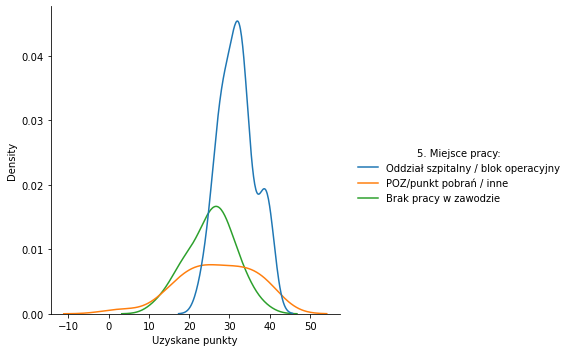

In [110]:
sns.displot(data=dane, x="Uzyskane punkty", hue="5. Miejsce pracy:",kind="kde")

Analizując wykres krzywej rozkładu punktów, zauważamy trudno dokładnie określic dominującą liczbę punktów wśród studentów pracujących na POZ / punkcie pobrać lub innych odziałach. Z większą dokładnością możemy określić trend punktacji dla studnetów nie pracujących w zawodzie gdzie pik krzywej skupia się w przedziale 20 - 30 punktów. Studneci pracujący na oddziale szpitalnym bądź bloku operacyjnym w zdecydowanej większości uzyskują punktację w z okolicach 30 punktów co pozwala określić poziom ich wiedzy na 75%.

Kolejnym krokiem analizy, jest wykazanie czy występują korelacje między obiektywnym / subiektywnym poziomem wiedzy osób przydzielonych do odpowiedniej grupy(wiek, staż pracy, miejsce zamieszkania, oddział pracy).
<br>Do analizy korelacji między subiektywną/obiektywną oceną ankietowanych, a odpowiedziami ankietowanych przydzielonych do poszczególnych grup, użyto statystycznego testu niezależności <span style='background:pink'>Chi Kwadrat Pearsona</span>.
Test Chi Kwadrat Pearsona jest testem statystycznym umożliwiającym ocenę zależności między interesującymi badacza czynnikami. Służy on do oceny, czy obserwowane w danej próbie zależności są efektem prawidłowości panującej w danej populacji, czy tylko przypadkowym rezultatem. Test Chi - Kwadrat stosowany jest do analizy zmiennych mających charakter danych jakościowych, nie liczbowych. Wynikiem testu jest tzw. prawdopodobieństwo testowe (p-value), którego niskie wartości świadczą o istotności statystycznej rozważonych różnic. W niniejszej pracy przyjęto poziom istotności p <0,05. .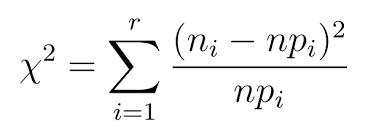
<br>W przypadku testu Chi-kwadrat hipoteza zerowa oraz hipoteza definiują się następująco:
<br><span style='background:pink'>H0</span> - Zmienne są niezależne, oraz nie ma związku między dwoma kategorialnymi zmiennymi (w  przypadku badania, między poszczególnymi grupami studentów, a ich poziomem obiektywnej / subiektywnej wiedzy). Znajomość wartości jednej zmiennej nie pomaga w przewidywaniu wartości drugiej zmiennej.
<br><span style='background:pink'>H1</span> - Zmienne są zależne, a także istnieje związek między dwiema zmiennymi kategorialnymi. Znajomość wartości jednej zmiennej pomaga przewidzieć wartość drugiej zmiennej (w  przypadku badania, między poszczególnymi grupami studentów, a ich poziomem obiektywnej / subiektywnej wiedzy).
<br>Obrano poziom istotności równy α = 0.05 ( w przypadku kiedy obliczona <span style='background:pink'>"wartość p</span> mówiąca o prawdopodobieństwie wystąpienia danego zjawiska będzie mniejsza niż obrany poziom istotności, należy odrzucić hipotezę <span style='background:pink'>H0</span> i tym samym przyjąć hipotezę <span style='background:pink'>H1 (alternatywną)</span>.
<br>Niestety, branie pod uwagę jedynie istotności statystycznej wyliczonej przy pomocy testu Chi kwadrat Pearsona, może być niewystarczające i nie świadczyć o jej sile. Przykładem może być zauważenie zależności poziomu wiedzy do danej grupy studentów, ale w niewielkim odniesieniu do całej populacji. Aby sprawdzić czy otrzymana statystyka <span style='background:pink'>Chi Kwadrat</span> jest wysoka czy też nie, zastosowano <span style='background:pink'>współczynnik V Cramera</span> pozwalający określić siłę tej zależności.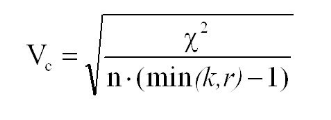
<br>Następnie przystąpiono do analiz:

1.1 SUBIEKTYWNA OCENA STUDENTOW Z PODZIAŁEM NA <span style='background:yellow'>GRUPY WIEKOWE</span>, NA TEMAT WŁASNEJ WIEDZY Z ZAKRESU CHNS

In [111]:
s_ocena_wiek = wyniki.pivot_table(index='Grupa wiekowa',columns='6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '\
,aggfunc='count').iloc[:,-3:].copy()

s_ocena_wiek.columns = [col[1] for col in s_ocena_wiek.columns]

s_ocena_wiek.loc['total_col',:]= s_ocena_wiek.sum(axis=0)
s_ocena_wiek['total_row'] = s_ocena_wiek.sum(axis=1)

s_ocena_wiek_emp = s_ocena_wiek.iloc[0:2,0:3]  #dane empiryczne do dalszej analizy korelacji

s_ocena_wiek
#s_ocena_wiek_emp

,Niski,Wysoki,Średni,total_row
Grupa wiekowa,,,,
Studenci do 25 r.ż.,21.0,13.0,34.0,68.0
Studenci powyżej 25 r.ż.,8.0,21.0,33.0,62.0
total_col,29.0,34.0,67.0,130.0


1.1 <span style='background:green'>KORELACJA</span>

In [112]:
chi2_11, p_val_11, l_ss_11, exp_11 = stats.chi2_contingency(observed = s_ocena_wiek_emp)
p_val_11

0.023946804806867665

Jak można zaobserwować wyżej "wartość p" jest mniejsza niż 0.05, dlatego koniecznym jest odrzucenie hipotezy <span style='background:pink'>H0</span>. Następnie należy policzyć siłę korelacji:

1.1 <span style='background:green'>SIŁA KORELACJI</span>

In [113]:
min_s_ocena_wiek_emp = min(s_ocena_wiek_emp.shape)-1
v_wiek_s = np.sqrt((chi2_11/130)/min_s_ocena_wiek_emp)

v_wiek_s

0.23961251973878372

1.2 SUBIEKTYWNA OCENA STUDENTOW Z PODZIAŁEM NA <span style='background:yellow'>DŁUGOŚĆ STAŻU PRACY</span>, NA TEMAT WŁASNEJ WIEDZY Z ZAKRESU CHNS

In [114]:
s_ocena_staz = wyniki.pivot_table(index='Zakres stażu pracy',columns='6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '\
,aggfunc='count').iloc[: , :3].copy()

s_ocena_staz.columns = [col[1] for col in s_ocena_staz.columns]

s_ocena_staz.loc['total_col',:]= s_ocena_staz.sum(axis=0)
s_ocena_staz['total_row'] = s_ocena_staz.sum(axis=1)

s_ocena_staz_emp = s_ocena_staz.iloc[0:4,0:3]  #dane empiryczne do dalszej analizy korelacji

s_ocena_staz
#s_ocena_staz_emp

,Niski,Wysoki,Średni,total_row
Zakres stażu pracy,,,,
Brak stażu pracy,15.0,1.0,19.0,35.0
Do 2 lat,4.0,14.0,14.0,32.0
Od 2 do 20 lat,7.0,11.0,14.0,32.0
Ponad 20 lat,3.0,8.0,20.0,31.0
total_col,29.0,34.0,67.0,130.0


1.2 <span style='background:green'>KORELACJA</span>

In [115]:
chi2_12, p_val_12, l_ss_12, exp_12 = stats.chi2_contingency(observed = s_ocena_staz_emp)
p_val_12

0.0005397570623453041

Jak można zaobserwować wyżej "wartość p" jest mniejsza niż 0.05, dlatego koniecznym jest odrzucenie hipotezy <span style='background:pink'>H0</span>. Następnie należy policzyć siłę korelacji:

1.2 <span style='background:green'>SIŁA KORELACJI</span>

In [116]:
min_s_ocena_staz_emp = min(s_ocena_staz_emp.shape)-1
v_staz_s = np.sqrt((chi2_11/130)/min_s_ocena_staz_emp)

v_staz_s

0.16943163756448945

1.3 SUBIEKTYWNA OCENA STUDENTOW Z PODZIAŁEM NA <span style='background:yellow'>MIEJSCOWOSC ZAMIESZKANIA</span>, NA TEMAT WŁASNEJ WIEDZY Z ZAKRESU CHNS

In [117]:
s_ocena_miejscowosc = wyniki.pivot_table(index='4. Miejsce zamieszkania:',columns='6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '\
,aggfunc='count').iloc[: , :3].copy()

s_ocena_miejscowosc.columns = [col[1] for col in s_ocena_miejscowosc.columns]

s_ocena_miejscowosc.loc['total_col',:]= s_ocena_miejscowosc.sum(axis=0)
s_ocena_miejscowosc['total_row'] = s_ocena_miejscowosc.sum(axis=1)

s_ocena_miejscowosc_emp = s_ocena_miejscowosc.iloc[0:2,0:3]  #dane empiryczne do dalszej analizy korelacji

s_ocena_miejscowosc

,Niski,Wysoki,Średni,total_row
4. Miejsce zamieszkania:,,,,
Miasto,15.0,27.0,43.0,85.0
Wieś,14.0,7.0,24.0,45.0
total_col,29.0,34.0,67.0,130.0


1.3 <span style='background:green'>KORELACJA</span>

In [118]:
chi2_13, p_val_13, l_ss_13, exp_13 = stats.chi2_contingency(observed = s_ocena_miejscowosc_emp)
p_val_13

0.06754790681763474

W tym przypadku "wartość p" > 0.05, dlatego należy zostać przy <span style='background:pink'>H0</span>

1.4 SUBIEKTYWNA OCENA STUDENTOW Z PODZIAŁEM NA <span style='background:yellow'>ODDZIAŁ</span>, NA TEMAT WŁASNEJ WIEDZY Z ZAKRESU CHNS

In [119]:
s_ocena_oddzial = wyniki.pivot_table(index='5. Miejsce pracy:',columns='6. Jak Pani/Pan ocenia swój poziom wiedzy na temat Choroby Niedokrwiennej Serca? '\
,aggfunc='count').iloc[: , :3].copy()

s_ocena_oddzial.columns = [col[1] for col in s_ocena_oddzial.columns]

s_ocena_oddzial.loc['total_col',:]= s_ocena_oddzial.sum(axis=0)
s_ocena_oddzial['total_row'] = s_ocena_oddzial.sum(axis=1)

s_ocena_oddzial_emp = s_ocena_oddzial.iloc[0:3,0:3]  #dane empiryczne do dalszej analizy korelacji
#s_ocena_oddzial_emp
s_ocena_oddzial

,Niski,Wysoki,Średni,total_row
5. Miejsce pracy:,,,,
Brak pracy w zawodzie,15.0,1.0,18.0,34.0
Oddział szpitalny / blok operacyjny,6.0,22.0,40.0,68.0
POZ/punkt pobrań / inne,8.0,11.0,9.0,28.0
total_col,29.0,34.0,67.0,130.0


1.4 <span style='background:green'>KORELACJA</span>

In [120]:
chi2_14, p_val_14, l_ss_14, exp_14 = stats.chi2_contingency(observed = s_ocena_oddzial_emp)
p_val_14

3.327255578064711e-05

Jak można zaobserwować wyżej "wartość p" < 0.05, dlatego koniecznym jest odrzucenie hipotezy <span style='background:pink'>H0</span>. Następnie należy policzyć siłę korelacji:

1.4 <span style='background:green'>SIŁA KORELACJI</span>

In [121]:
min_s_ocena_oddzial_emp = min(s_ocena_oddzial_emp.shape)-1
v_oddzial_s  = np.sqrt((chi2_14/130)/min_s_ocena_wiek_emp)

v_oddzial_s

0.4462832507304066

2.1 OBIEKTYWNA OCENA STUDENTOW Z PODZIAŁEM NA <span style='background:yellow'>GRUPY WIEKOWE</span>, NA TEMAT WŁASNEJ WIEDZY Z ZAKRESU CHNS

In [122]:
o_ocena_wiek = wyniki.pivot_table(index='Grupa wiekowa',columns='Obiektywny poziom wiedzy',aggfunc='count').iloc[: , :3].copy()

o_ocena_wiek.columns = [col[1] for col in o_ocena_wiek.columns]

o_ocena_wiek.loc['total_col',:]= o_ocena_wiek.sum(axis=0)
o_ocena_wiek['total_row'] = o_ocena_wiek.sum(axis=1)

o_ocena_wiek_emp = o_ocena_wiek.iloc[0:2,0:3]  #dane empiryczne do dalszej analizy korelacji

#o_ocena_wiek
o_ocena_wiek_emp

,Niski,Wysoki,Średni
Grupa wiekowa,,,
Studenci do 25 r.ż.,1.0,37.0,30.0
Studenci powyżej 25 r.ż.,1.0,48.0,13.0


2.1 <span style='background:green'>KORELACJA</span>

In [123]:
chi2_21, p_val_21, l_ss_21, exp_21 = stats.chi2_contingency(observed = o_ocena_wiek_emp)
p_val_21

0.019406139446962865

Jak można zaobserwować wyżej "wartość p" < 0.05, dlatego koniecznym jest odrzucenie hipotezy <span style='background:pink'>H0</span>. Następnie należy policzyć siłę korelacji:

2.1 <span style='background:green'>SIŁA KORELACJI</span>

In [124]:
min_o_ocena_wiek_emp = min(o_ocena_wiek_emp.shape)-1
v_wiek_o  = np.sqrt((chi2_21/130)/min_o_ocena_wiek_emp)

v_wiek_o

0.2462695770160906

2.2 OBIEKTYWNA OCENA STUDENTOW Z PODZIAŁEM NA <span style='background:yellow'>STAŻ PRACY</span>, NA TEMAT WŁASNEJ WIEDZY Z ZAKRESU CHNS

In [125]:
o_ocena_staz = wyniki.pivot_table(index='Zakres stażu pracy',columns='Obiektywny poziom wiedzy',aggfunc='count').iloc[: , :3]\
.copy().fillna(value=0)

o_ocena_staz.columns = [col[1] for col in o_ocena_staz.columns]

o_ocena_staz.loc['total_col',:]= o_ocena_staz.sum(axis=0)
o_ocena_staz['total_row'] = o_ocena_staz.sum(axis=1)

o_ocena_staz_emp = o_ocena_staz.iloc[0:4,0:3]  #dane empiryczne do dalszej analizy korelacji

o_ocena_staz
#o_ocena_staz_emp

,Niski,Wysoki,Średni,total_row
Zakres stażu pracy,,,,
Brak stażu pracy,1.0,16.0,18.0,35.0
Do 2 lat,0.0,22.0,10.0,32.0
Od 2 do 20 lat,1.0,24.0,7.0,32.0
Ponad 20 lat,0.0,23.0,8.0,31.0
total_col,2.0,85.0,43.0,130.0


2.2 <span style='background:green'>KORELACJA</span>

In [126]:
chi2_22, p_val_22, l_ss_22, exp_22 = stats.chi2_contingency(observed = o_ocena_staz_emp)
p_val_22,chi2_22

(0.11885092104327638, 10.140690148902772)

W tym przypadku "wartość p" > 0.05, dlatego należy zostać przy <span style='background:pink'>H0</span>

2.3 OBIEKTYWNA OCENA STUDENTOW Z PODZIAŁEM NA <span style='background:yellow'>MIEJSCE ZAMIESZKANIA</span>, NA TEMAT WŁASNEJ WIEDZY Z ZAKRESU CHNS

In [127]:
o_ocena_miejscowosc = wyniki.pivot_table(index='4. Miejsce zamieszkania:',columns='Obiektywny poziom wiedzy',aggfunc='count')\
.iloc[: , :3].copy().fillna(value=0)

o_ocena_miejscowosc.columns = [col[1] for col in o_ocena_miejscowosc.columns]

o_ocena_miejscowosc.loc['total_col',:]= o_ocena_miejscowosc.sum(axis=0)
o_ocena_miejscowosc['total_row'] = o_ocena_miejscowosc.sum(axis=1)

o_ocena_miejscowosc_emp = o_ocena_miejscowosc.iloc[0:2,0:3]  #dane empiryczne do dalszej analizy korelacji

#o_ocena_miejscowosc
o_ocena_miejscowosc_emp

,Niski,Wysoki,Średni
4. Miejsce zamieszkania:,,,
Miasto,2.0,58.0,25.0
Wieś,0.0,27.0,18.0


2.3 <span style='background:green'>KORELACJA</span>

In [128]:
chi2_23, p_val_23, l_ss_23, exp_23 = stats.chi2_contingency(observed = o_ocena_miejscowosc_emp)
p_val_23

0.3070824712863908

W tym przypadku "wartość p" > 0.05, dlatego należy zostać przy <span style='background:pink'>H0</span>

2.4 OBIEKTYWNA OCENA STUDENTOW Z PODZIAŁEM NA <span style='background:yellow'>ODDZIAŁ</span>, NA TEMAT WŁASNEJ WIEDZY Z ZAKRESU CHNS

In [129]:
o_ocena_oddzial = wyniki.pivot_table(index='5. Miejsce pracy:',columns='Obiektywny poziom wiedzy',aggfunc='count')\
.iloc[: , :3].copy().fillna(value=0)

o_ocena_oddzial.columns = [col[1] for col in o_ocena_oddzial.columns]

o_ocena_oddzial.loc['total_col',:]= o_ocena_oddzial.sum(axis=0)
o_ocena_oddzial['total_row'] = o_ocena_oddzial.sum(axis=1)

o_ocena_oddzial_emp = o_ocena_oddzial.iloc[0:3,0:3]  #dane empiryczne do dalszej analizy korelacji

o_ocena_oddzial

,Niski,Wysoki,Średni,total_row
5. Miejsce pracy:,,,,
Brak pracy w zawodzie,1.0,14.0,19.0,34.0
Oddział szpitalny / blok operacyjny,0.0,57.0,11.0,68.0
POZ/punkt pobrań / inne,1.0,14.0,13.0,28.0
total_col,2.0,85.0,43.0,130.0


2.4 <span style='background:green'>KORELACJA</span>

In [130]:
chi2_24, p_val_24, l_ss_24, exp_24 = stats.chi2_contingency(observed = o_ocena_oddzial_emp)
p_val_24

0.0001552178003904149

Jak można zaobserwować wyżej "wartość p" jest mniejsza niż 0.05, dlatego koniecznym jest odrzucenie hipotezy <span style='background:pink'>H0</span>. Następnie należy policzyć siłę korelacji:

2.4 <span style='background:green'>SIŁA KORELACJI</span>

In [131]:
min_o_ocena_oddzial_emp = min(o_ocena_oddzial_emp.shape)-1
v_oddzial_o  = np.sqrt((chi2_24/130)/min_o_ocena_oddzial_emp)

v_oddzial_o

0.29454702876598526

Następnie stworzono tabele prezentujące uzyskane wyniki z podziałem na subiektywną / obiektywną wiedzę ankietowanych: 

In [132]:
o_korelacje = pd.DataFrame(np.array([[stats.chi2_contingency(observed = o_ocena_wiek_emp)[0],stats.chi2_contingency(observed = o_ocena_wiek_emp)[1]],\
            [stats.chi2_contingency(observed = o_ocena_staz_emp)[0],stats.chi2_contingency(observed = o_ocena_staz_emp)[1]],\
            [stats.chi2_contingency(observed = o_ocena_miejscowosc_emp)[0],stats.chi2_contingency(observed = o_ocena_miejscowosc_emp)[1]],\
            [stats.chi2_contingency(observed = o_ocena_oddzial_emp)[0],stats.chi2_contingency(observed = o_ocena_oddzial_emp)[1]]]))

o_korelacje.columns = ['Obliczone Chi kwadrat','wartość p']
o_korelacje.index = ['Wiek','Staż pracy','Miejsce zamieszkania', 'Oddział']

#o_korelacje.style.set_table_attributes("style='display:inline'").set_caption('Test Chi kwadrat Pearsona - wyniki obiektywnego poziomu wiedzy')

In [133]:
s_korelacje = pd.DataFrame(np.array([[stats.chi2_contingency(observed = s_ocena_wiek_emp)[0],stats.chi2_contingency(observed = s_ocena_wiek_emp)[1]],\
            [stats.chi2_contingency(observed = s_ocena_staz_emp)[0],stats.chi2_contingency(observed = s_ocena_staz_emp)[1]],\
            [stats.chi2_contingency(observed = s_ocena_miejscowosc_emp)[0],stats.chi2_contingency(observed = s_ocena_miejscowosc_emp)[1]],\
            [stats.chi2_contingency(observed = s_ocena_oddzial_emp)[0],stats.chi2_contingency(observed = s_ocena_oddzial_emp)[1]]]))

s_korelacje.columns = ['Obliczone Chi kwadrat','wartość p']
s_korelacje.index = ['Wiek','Staż pracy','Miejsce zamieszkania', 'Oddział']

#s_korelacje.style.set_table_attributes("style='display:inline'").set_caption('Test Chi kwadrat Pearsona - wyniki subiektywnego poziomu wiedzy')

Aby określić, czy dany współczynnik V Cramera świadczy o silnej korelacji, należy uwzględnić przy analizie wyniku, stopnie swobody dla testu V Cramera analizowanych danych. W tym celu, powołano się na dane poniższej tabeli mówiącej o siłach korelacji przy poszczególnej ilości stopni swobody:<br><br>
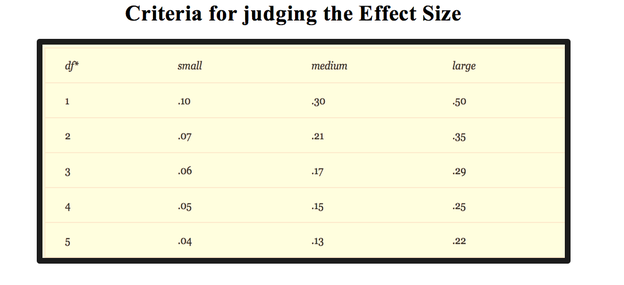

Tak więc:

In [134]:
def tak_nie(x):
    if x <0.05:
        return 'Tak'
    else:
        return 'Nie'

s_korelacje['Czy występuje istotna zależność?']= s_korelacje['wartość p'].apply(lambda x : tak_nie(x))
o_korelacje['Czy występuje istotna zależność?']= o_korelacje['wartość p'].apply(lambda x : tak_nie(x))

s_korelacje['Siła zależności'] = [round(v_wiek_s,1),round(v_staz_s,1),'-',round(v_oddzial_s,1)]
o_korelacje['Siła zależności'] = [round(v_wiek_o,1),'-','-',round(v_oddzial_o,1)]

s_korelacje['l. stopni swobody Vc'] = [min_s_ocena_wiek_emp,min_s_ocena_staz_emp,'-',min_s_ocena_oddzial_emp]
o_korelacje['l. stopni swobody Vc'] = [min_o_ocena_wiek_emp,'-','-',min_s_ocena_oddzial_emp]

s_korelacje['Siła korelacji'] = ['Słaby związek','Słaby związek','-','Silny związek']
o_korelacje['Siła korelacji'] = ['Słaby związek','-','-','Umiarkowany związek']

display(s_korelacje[['Obliczone Chi kwadrat', 'wartość p','Czy występuje istotna zależność?','Siła zależności','l. stopni swobody Vc','Siła korelacji']].style.set_table_attributes("style='display:inline'").set_caption('Test Chi kwadrat Pearsona - wyniki subiektywnego poziomu wiedzy'))
display(o_korelacje[['Obliczone Chi kwadrat', 'wartość p','Czy występuje istotna zależność?','Siła zależności','l. stopni swobody Vc','Siła korelacji']].style.set_table_attributes("style='display:inline'").set_caption('Test Chi kwadrat Pearsona - wyniki obiektywnego poziomu wiedzy'))

,Obliczone Chi kwadrat,wartość p,Czy występuje istotna zależność?,Siła zależności,l. stopni swobody Vc,Siła korelacji
Wiek,7.463841,0.023947,Tak,0.200000,1,Słaby związek
Staż pracy,23.922163,0.000540,Tak,0.200000,2,Słaby związek
Miejsce zamieszkania,5.389836,0.067548,Nie,-,-,-
Oddział,25.891936,0.000033,Tak,0.400000,2,Silny związek


,Obliczone Chi kwadrat,wartość p,Czy występuje istotna zależność?,Siła zależności,l. stopni swobody Vc,Siła korelacji
Wiek,7.884332,0.019406,Tak,0.200000,1,Słaby związek
Staż pracy,10.140690,0.118851,Nie,-,-,-
Miejsce zamieszkania,2.361278,0.307082,Nie,-,-,-
Oddział,22.557068,0.000155,Tak,0.300000,2,Umiarkowany związek


Uzyskane powyżej wyniki, są końcowymi wynikami analizy danych z ankiety. Na ich podstawie, można stwierdzić w jakich grupach występują korelacje z subiektywnym odczuciem / faktycznym poziomem wiedzy ankietowanych, oraz jak silne zależności dla całej populacji stanowią występujące korelacje.